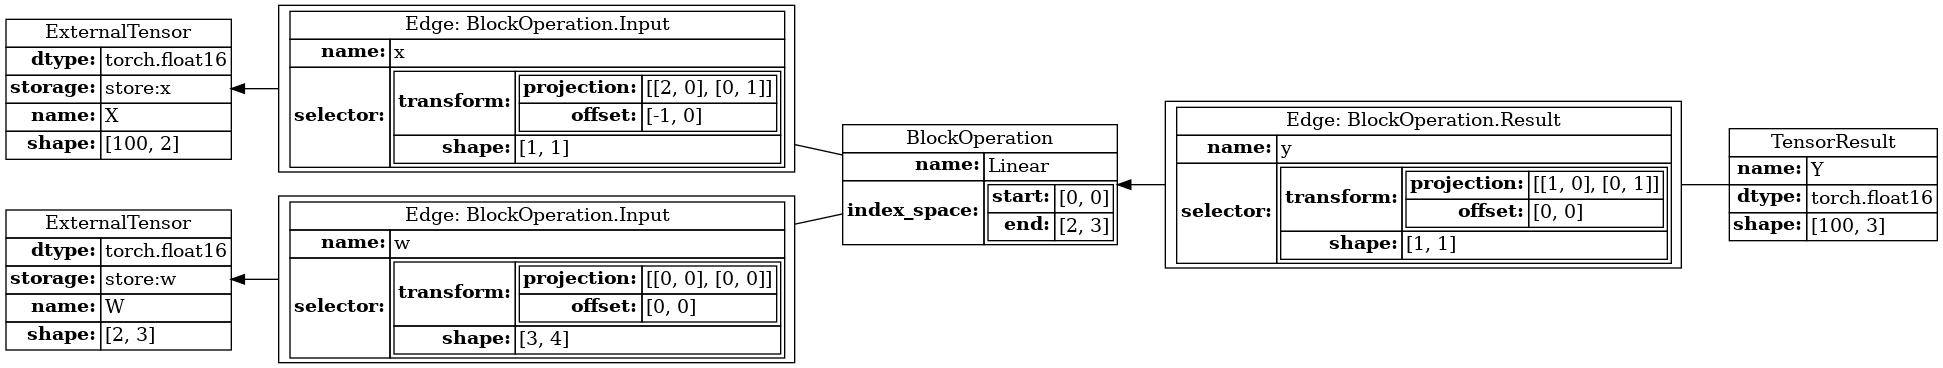

[BlockOperation.Input(_graph=<weakref at 0x7f076f7ddad0; to 'TapestryGraph' at 0x7f076c1489d0>, node_id=UUID('baf7679c-6b00-4417-8740-141dfb5332d8'), name='x', source_node_id=UUID('e41a06f9-a117-44c6-bd98-112acf31cb95'), target_node_id=UUID('a614fad7-9080-44f0-a63a-d46e8916a8bd'), selector=ZRangeMap(transform=ZTransform(projection=array([[2, 0],
       [0, 1]]), offset=array([-1,  0])), shape=array([1, 1]))), BlockOperation.Input(_graph=<weakref at 0x7f076f7ddad0; to 'TapestryGraph' at 0x7f076c1489d0>, node_id=UUID('7f940134-0d43-40d1-9f73-bd478c4910cc'), name='w', source_node_id=UUID('e41a06f9-a117-44c6-bd98-112acf31cb95'), target_node_id=UUID('0ba4530c-b843-4425-ab3c-7f7bedad833f'), selector=ZRangeMap(transform=ZTransform(projection=array([[0, 0],
       [0, 0]]), offset=array([0, 0])), shape=array([3, 4])))]
[BlockOperation.Result(_graph=<weakref at 0x7f076f7ddad0; to 'TapestryGraph' at 0x7f076c1489d0>, node_id=UUID('dda075c2-845e-476b-93d4-588904b6c8c7'), name='y', source_node_id=U

In [1]:
import numpy as np

from tapestry.expression_graph import (
    BlockOperation,
    ExternalTensor,
    TensorResult,
    TapestryGraph,
)
from tapestry.jupyter_utils import display_graph_doc
from tapestry.zspace import ZRange, ZRangeMap, ZTransform

g = TapestryGraph()

x = g.add_node(
    ExternalTensor(
        name="X",
        shape=np.array([100, 2]),
        dtype="torch.float16",
        storage="store:x",
    )
)

w = g.add_node(
    ExternalTensor(
        name="W",
        shape=np.array([2, 3]),
        dtype="torch.float16",
        storage="store:w",
    )
)

y = g.add_node(
    TensorResult(
        name="Y",
        shape=np.array([100, 3]),
        dtype="torch.float16",
    )
)

linear = g.add_node(
    BlockOperation(
        name="Linear",
        index_space=ZRange([2, 3]),
    )
)

g.add_node(
    BlockOperation.Input(
        source_node_id=linear.node_id,
        target_node_id=x.node_id,
        name="x",
        selector=ZRangeMap(
            transform=ZTransform(
                projection=[[2, 0], [0, 1]],
                offset=[-1, 0],
            ),
            shape=[1, 1],
        ),
    )
)

g.add_node(
    BlockOperation.Input(
        source_node_id=linear.node_id,
        target_node_id=w.node_id,
        name="w",
        selector=ZRangeMap(
            transform=ZTransform(
                projection=[[0, 0], [0, 0]],
                offset=[0, 0],
            ),
            shape=[3, 4],
        ),
    )
)

g.add_node(
    BlockOperation.Result(
        source_node_id=y.node_id,
        target_node_id=linear.node_id,
        name="y",
        selector=ZRangeMap(
            transform=ZTransform(
                projection=[[1, 0], [0, 1]],
                offset=[0, 0],
            ),
            shape=[1, 1],
        ),
    )
)

display_graph_doc(g)

print(linear.inputs())
print(linear.results())